# Crawling 크롤링

- 웹 상의 데이터를 수집하기 위해서 크롤링을 사용
- 웹 페이지 접속(요청) -> (응답) / -> 해당 웹 페이지에 어디에 위치 -> 값을 가져옴 -> 어떤 데이터 형식인지 -> 데이터 변환 -> 데이터 저장
- Python: Numpy, Pandas, Requests, BeautifulSoup ...
- 데이터 수집

## 요청 라이브러리: Requests

- !pip install requests
- HTTP 요청을 보내는데 사용하는 라이브러리
- 클라이언트의 요청

In [1]:
import requests

In [2]:
print(requests.__version__)

2.27.1


In [3]:
html = requests.get('http://www.paullab.co.kr/stock.html')
html

<Response [200]>

In [5]:
html.text

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n  <meta http-equiv="X-UA-Compatible" content="ie=edge">\n  <title>Document</title>\n  <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css">\n  <link rel="stylesheet" type="text/css" href="https://pro.fontawesome.com/releases/v5.10.0/css/all.css" integrity="sha384-AYmEC3Yw5cVb3ZcuHtOA93w35dYTsvhLPVnYs9eStHfGJvOvKxVfELGroGkvsg+p" crossorigin="anonymous">\n  <style>\n    h1{\n      margin: 2rem;\n    }\n    h1>span{\n      font-size: 1rem;\n    }\n    .main {\n      width: 80%;\n      margin: 0 auto;\n      text-align: center;\n    }\n\n    table {\n      width: 100%;\n    }\n\n    a {\n      color: inherit;\n      cursor: pointer;\n      text-decoration: none;\n    }\n\n    a:hover {\n      color: #000;\n      text-decoration: none;\n    }\n\n    em {\n      font: inherit;\n    }\n\n    #informa

In [ ]:
'''
# post 요청 보내는 방법
import json

body = { 'id': 'aaa', 'pw': 1234 }
post = requests.post('url', data=json.dumps(body))
'''

## HTML 변환 라이브러리: BeautifulSoup

In [6]:
from bs4 import BeautifulSoup

html = requests.get('http://www.paullab.co.kr/stock.html')
text = html.text

In [7]:
soup = BeautifulSoup(text, 'html.parser') # 'html.parser', 'xml'

In [8]:
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="ie=edge" http-equiv="X-UA-Compatible"/>
<title>Document</title>
<link href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css" rel="stylesheet"/>
<link crossorigin="anonymous" href="https://pro.fontawesome.com/releases/v5.10.0/css/all.css" integrity="sha384-AYmEC3Yw5cVb3ZcuHtOA93w35dYTsvhLPVnYs9eStHfGJvOvKxVfELGroGkvsg+p" rel="stylesheet" type="text/css"/>
<style>
    h1{
      margin: 2rem;
    }
    h1>span{
      font-size: 1rem;
    }
    .main {
      width: 80%;
      margin: 0 auto;
      text-align: center;
    }

    table {
      width: 100%;
    }

    a {
      color: inherit;
      cursor: pointer;
      text-decoration: none;
    }

    a:hover {
      color: #000;
      text-decoration: none;
    }

    em {
      font: inherit;
    }

    #information {
      padding: 15px;
      margin-bottom: 50p

In [9]:
soup.title

<title>Document</title>

In [10]:
soup.title.string

'Document'

In [11]:
soup.title.text

'Document'

In [12]:
soup.table # <table> </table>
# <tr> </tr>
# <th> </th>
# <td> </td>

<table class="border-style" summary="시가총액 정보">
<tr>
<th class="strong" scope="row">시가총액</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
</tr>
<tr>
<th scope="row">
<a class="link_site" href="#">시가총액순위<i class="fas fa-caret-right"></i></a>
</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td>위니브월드 <em id="_market_sum">1</em>위</td>
</tr>
<tr>
<th scope="row">상장주식수</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td><em id="_market_sum">5,969,782,550</em></td>
</tr>
</table>

In [13]:
soup.tr

<tr>
<th class="strong" scope="row">시가총액</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
</tr>

In [14]:
soup.find('table') # soup.table , soup.title == soup.find('title')

<table class="border-style" summary="시가총액 정보">
<tr>
<th class="strong" scope="row">시가총액</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
</tr>
<tr>
<th scope="row">
<a class="link_site" href="#">시가총액순위<i class="fas fa-caret-right"></i></a>
</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td>위니브월드 <em id="_market_sum">1</em>위</td>
</tr>
<tr>
<th scope="row">상장주식수</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td><em id="_market_sum">5,969,782,550</em></td>
</tr>
</table>

In [15]:
soup.find_all('table') # <태그 속성='값'></태그>
                       # id='stock': 페이지 당 하나 -> selector
                       # class='2022': 페이지(html 파일 안에) 당 -> selector(선택자)

[<table class="border-style" summary="시가총액 정보">
 <tr>
 <th class="strong" scope="row">시가총액</th>
 <!-- 공백은 의도적으로 넣은 것입니다. -->
 <td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
 </tr>
 <tr>
 <th scope="row">
 <a class="link_site" href="#">시가총액순위<i class="fas fa-caret-right"></i></a>
 </th>
 <!-- 공백은 의도적으로 넣은 것입니다. -->
 <td>위니브월드 <em id="_market_sum">1</em>위</td>
 </tr>
 <tr>
 <th scope="row">상장주식수</th>
 <!-- 공백은 의도적으로 넣은 것입니다. -->
 <td><em id="_market_sum">5,969,782,550</em></td>
 </tr>
 </table>,
 <table class="border-style" summary="업종상세 정보">
 <tr>
 <th class="strong" scope="row">현재가</th>
 <td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
 </tr>
 <tr>
 <th scope="row">52주 최고 <span class="bar">l</span> 최저</th>
 <td>
 <em>62,800</em>
 <span class="bar">l</span>
 <em>42,300</em>
 </td>
 </tr>
 <tr>
 <th scope="row">배당수익률 <span class="bar">l</span><span> 2019.12</span>
 <a alt="배당수익률 상세설명" class="help" href="#"><em>?</em></a>
 <div class="lyr_section" style="disp

In [16]:
soup.find('span', id=('update'))

<span id="update">update : 20.12.30 / 해외 크롤링이 Block되어 있으므로 크롤링이 안되시는 분은 이 URL(http://paullab.synology.me/stock.html)을 사용하세요.</span>

In [17]:
soup.find_all('table', class_='table') # 결과값 리스트, [0] 가능

[<table class="table table-hover">
 <tbody>
 <tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span

In [18]:
tag = soup.find(id=('update'))

In [19]:
dir(tag) # dir -> 어떤 객체 .을 찍고 사용할 수 있는 매서드의 목록을 보여줌

['DEFAULT_INTERESTING_STRING_TYPES',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_find_all',
 '_find_one',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_namespaces',
 '_should_pretty_print',
 'append',
 'attrs',
 'can_be_empty_element',
 'cdata_list_attributes',
 'childGenerator',
 'children',
 'clear',
 'contents',
 'decode',
 'decode_contents',
 'decompose',
 'decomposed',
 'default',
 'descendants',
 'encode',
 'encode_contents',
 'extend',
 'extract',
 'fetchNextSiblings'

In [ ]:
tag = soup.find(id=('id')) # <span id="update">update : 20.12.30 / 해외 크롤링이 Block되어 있으므로 크롤링이 안되시는 분은 이 URL(http://paullab.synology.me/stock.html)을 사용하세요.</span>

In [20]:
tag.name

'span'

In [23]:
tag['id']

'update'

In [24]:
# find(), find_all()

# id, class -> selector
# id: #id명, class: .class명

# soup.find(id='update') soup.find(id=('update'))
soup.select('#update')

[<span id="update">update : 20.12.30 / 해외 크롤링이 Block되어 있으므로 크롤링이 안되시는 분은 이 URL(http://paullab.synology.me/stock.html)을 사용하세요.</span>]

In [25]:
soup.select('.table')

[<table class="table table-hover">
 <tbody>
 <tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span

In [26]:
# <table> <tbody> <tr> ... </tr> </tbody> </table>
# <table>  >  <tbody>  >  <tr>

soup.select('.table > tbody') # 리스트 형태로 리턴

[<tbody>
 <tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span>
 </td>
 <td class="num"><span>6,8

In [27]:
soup.select('.table > tr') # table 바로 아래에는 tbody가 존재하기 때문에 tr로 바로 접근할 수 없습니다.

[]

In [28]:
soup.select('.table > tbody > tr') # 리스트 형태, [0]

[<tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>,
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>,
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span>
 </td>
 <td class="num"><span>6,830</spa

In [29]:
# 여러 번 접근하기

one = soup.select('.main')[2]

In [30]:
one # div > h2, h3, table # #information > div > div.tables
    # 크롬 브라우저 -> 오른쪽 클릭 -> 검사 -> (왼쪽 상단) 마우스 클릭 모양 선택 -> 내가 원하는 곳을 찾는다.
    # -> 오른쪽 클릭 -> copy -> copy select -> 자동으로 경로 복사
    # body > div:nth-child(5) > table

<div class="main">
<h2 id="제주코딩베이스캠프연구원">제주코딩베이스캠프 연구원</h2>
<h3><span style="color: salmon">일별</span> 시세</h3>
<table class="table table-hover">
<tbody>
<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>
<tr>
<td align="center "><span class="date">2019.10.23</span></td>
<td class="num"><span>6,650</span></td>
<td class="num">
<img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            20
                        </span>
</td>
<td class="num"><span>6,590</span></td>
<td class="num"><span>6,830</span></td>
<td class="num"><span>6,580</span></td>
<td class="num"><span>398,421</span></td>
</tr>
<tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>6,630</span></td>
<td class="num">
<img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class

In [31]:
two = one.select('tbody > tr')

In [32]:
two

[<tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>,
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>,
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span>
 </td>
 <td class="num"><span>6,830</spa

In [ ]:
# body > div:nth-child(3) > table

In [34]:
a = soup.find_all('table', class_='table')[0] # -> [a, b, c ...]

In [35]:
# > 

<table class="table table-hover">
<tbody>
<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>
<tr>
<td align="center "><span class="date">2019.10.23</span></td>
<td class="num"><span>6,650</span></td>
<td class="num">
<img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            20
                        </span>
</td>
<td class="num"><span>6,590</span></td>
<td class="num"><span>6,830</span></td>
<td class="num"><span>6,580</span></td>
<td class="num"><span>398,421</span></td>
</tr>
<tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>6,630</span></td>
<td class="num">
<img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                            190
                        </span>
</td>
<td class="num"><span>6

- Requests -> BeautifulSoup -> 변환, 접근


## 금융 데이터 크롤링 라이브러리: FinanceDataReader

- 주식 가격, 지수, 환율, 암화 화폐 가격 ... 
- 시계열 데이터 수집
- 거래소별, 종목(코드)별, 단축(코드)별 데이터 수집 가능

### 라이브러리 설치

In [36]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 라이브러리 사용

In [37]:
import FinanceDataReader as fdr

In [38]:
fdr.__version__

'0.9.50'

#### krx 한국 거래소의 주식 리스트

In [39]:
# fdr 이용해서 데이터를 불러오면 -> 데이터프레임 형태

df_krx = fdr.StockListing('krx')
'''
KOSPI 코스피 종목, KODAQ 코스닥, NASDAQ 나스닥, NYSE 뉴욕증권거래서, S&P500 ...
'''

In [40]:
df_krx.head() # 삼성전자의 코드번호를 알아옴

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,70400,1,1600,2.33,69800,70400,69500,14676549,1027961308850,420272691520000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,578000,2,-5000,-0.86,580000,583000,575000,71865,41627495000,135252000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,109000,1,5500,5.31,107500,109700,106100,6797770,731822668600,79352257785000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,779000,3,0,0.00,778000,782000,773000,13793,10730615000,55444546000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,702000,2,-10000,-1.40,708000,716000,697000,95011,67094763000,49555824786000,70592343,STK


In [41]:
df_krx.shape # 2717개 주식 종목의 17가지 정보

(2717, 17)

In [42]:
df_krx.describe()

,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2.717000e+03,2.717000e+03,2.717000e+03,2.717000e+03
mean,-110.784321,-0.479555,20853.210894,21091.676481,20538.284873,4.575319e+05,4.387903e+09,8.972942e+11,4.186701e+07
std,918.041609,2.751528,53295.045906,53749.796633,52639.921983,2.497508e+06,2.845452e+10,9.084908e+12,1.343060e+08
min,-22000.000000,-15.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.216000e+09,1.098520e+05
25%,-120.000000,-1.500000,2865.000000,2900.000000,2800.000000,1.126300e+04,7.418895e+07,6.271113e+10,1.001394e+07
50%,-30.000000,-0.590000,6780.000000,6920.000000,6650.000000,4.736300e+04,3.052661e+08,1.258500e+11,1.954779e+07
75%,0.000000,0.000000,16880.000000,17200.000000,16580.000000,1.669090e+05,1.495540e+09,3.018474e+11,4.123263e+07
max,12000.000000,30.000000,778000.000000,782000.000000,773000.000000,6.680078e+07,1.027961e+12,4.202727e+14,5.969783e+09


In [43]:
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         2717 non-null   object 
 1   ISU_CD       2717 non-null   object 
 2   Name         2717 non-null   object 
 3   Market       2717 non-null   object 
 4   Dept         2717 non-null   object 
 5   Close        2717 non-null   object 
 6   ChangeCode   2717 non-null   object 
 7   Changes      2717 non-null   int64  
 8   ChagesRatio  2717 non-null   float64
 9   Open         2717 non-null   int64  
 10  High         2717 non-null   int64  
 11  Low          2717 non-null   int64  
 12  Volume       2717 non-null   int64  
 13  Amount       2717 non-null   int64  
 14  Marcap       2717 non-null   int64  
 15  Stocks       2717 non-null   int64  
 16  MarketId     2717 non-null   object 
dtypes: float64(1), int64(8), object(8)
memory usage: 361.0+ KB


#### 단일 종목의 주식 가격
- 005930 코드번호를 이용

In [44]:
samsaung_df = fdr.DataReader('005930')
samsaung_df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-02-10,1653,1675,1604,1634,664282,NaN
1999-02-11,1661,1678,1643,1644,287590,0.006120
1999-02-12,1682,1751,1667,1743,403600,0.060219
1999-02-18,1712,1721,1682,1687,440930,-0.032129
1999-02-19,1663,1663,1602,1653,503847,-0.020154
...,...,...,...,...,...,...
2023-05-22,68400,69000,68000,68500,14470308,0.001462
2023-05-23,68500,68700,68100,68400,8561643,-0.001460
2023-05-24,68100,68700,68000,68500,8192896,0.001462


In [45]:
samsaung_df_2022 = fdr.DataReader('005930', '2022') # 2022년부터 ~
samsaung_df_2022

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2023-05-22,68400,69000,68000,68500,14470308,0.001462
2023-05-23,68500,68700,68100,68400,8561643,-0.001460
2023-05-24,68100,68700,68000,68500,8192896,0.001462


In [46]:
samsaung_df_2022_ = fdr.DataReader('005930', '2022', '2023') # 2022년부터 ~22 12월 마지막 날까지
samsaung_df_2022_

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454


In [47]:
samsaung_df_2022_ = fdr.DataReader('005930', '2022-01-03', '2022-03-31') # 2022년부터 ~22 12월 마지막 날까지
samsaung_df_2022_

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
2022-01-10,78100,78100,77100,78000,9947422,-0.003831
2022-01-11,78400,79000,78000,78900,13221123,0.011538
2022-01-12,79500,79600,78600,78900,11000502,0.000000
2022-01-13,79300,79300,77900,77900,13889401,-0.012674


#### 상장폐지 종목 데이터

In [48]:
del_stock = fdr.DataReader('003497', exchange='krx-delisting') # 003497 상장 폐지 -> krx에는 데이터가 없음, exchange='krx-delisting'
del_stock

In [49]:
del_stock

,Date,Code,Name,Market,SecuGroup,Close,UpDown,Change,ChangeRate,Open,High,Lower,Volume,Amount,MarCap
0,2001-04-13,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
1,2001-04-12,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
2,2001-04-11,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
3,2001-04-10,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
4,2001-04-09,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,1998-04-30,003497,대한항공(2우B),KOSPI,주권,1915,1,5,0.26,1915,1915,1915,110,210650,660282425
754,1998-04-29,003497,대한항공(2우B),KOSPI,주권,1910,2,-95,-4.74,1910,1910,1910,430,821300,658558450
755,1998-04-28,003497,대한항공(2우B),KOSPI,주권,2005,1,5,0.25,2005,2005,2005,100,200500,691313975
756,1998-04-27,003497,대한항공(2우B),KOSPI,주권,2000,1,90,4.71,1910,2000,1910,260,501100,689590000


#### 단일 종목 그래프

In [53]:
samsaung_df_2022_['Close']

Date
2022-01-03    78600
2022-01-04    78700
2022-01-05    77400
2022-01-06    76900
2022-01-07    78300
2022-01-10    78000
2022-01-11    78900
2022-01-12    78900
2022-01-13    77900
2022-01-14    77300
2022-01-17    77500
2022-01-18    77000
2022-01-19    76300
2022-01-20    76500
2022-01-21    75600
2022-01-24    75100
2022-01-25    74000
2022-01-26    73300
2022-01-27    71300
2022-01-28    73300
2022-02-03    73300
2022-02-04    74000
2022-02-07    73000
2022-02-08    73500
2022-02-09    74700
2022-02-10    75400
2022-02-11    74900
2022-02-14    73700
2022-02-15    73700
2022-02-16    74800
2022-02-17    75000
2022-02-18    74300
2022-02-21    74200
2022-02-22    73400
2022-02-23    73000
2022-02-24    71500
2022-02-25    71900
2022-02-28    72100
2022-03-02    71700
2022-03-03    72900
2022-03-04    71500
2022-03-07    70100
2022-03-08    69500
2022-03-10    71200
2022-03-11    70000
2022-03-14    70200
2022-03-15    69500
2022-03-16    70400
2022-03-17    71200
2022-03-18    7

<Axes: xlabel='Date'>

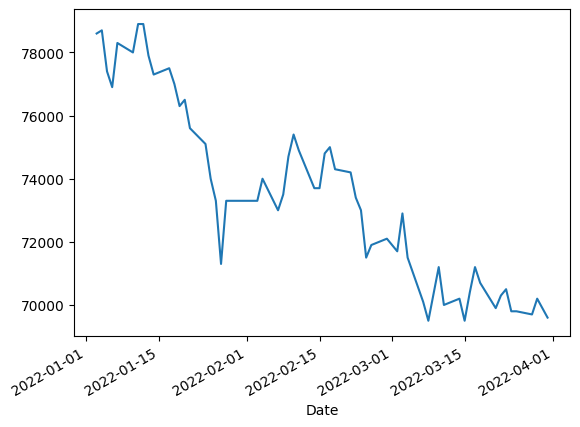

In [52]:
samsaung_df_2022_['Close'].plot()

<Axes: xlabel='Date'>

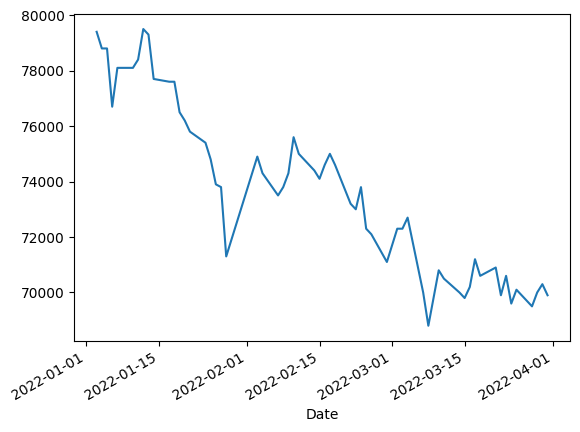

In [54]:
# 시가(Open) 데이터를 그래프로 그려주세요.
samsaung_df_2022_['Open'].plot()

#### 환율 데이터

In [55]:
ex_us_kw_df = fdr.DataReader('USD/KRW', '2023')
ex_us_kw_df
'''
EUR/USD(유로당 달러), CNY/KRW(위엔당 원), JPY/KRW(엔당 원), USD/JPY(달러당 엔) ...
'''

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,1260.910034,1273.930054,1256.550049,1260.910034,1260.910034,0
2023-01-03,1270.099976,1278.969971,1264.390015,1270.099976,1270.099976,0
2023-01-04,1279.079956,1279.719971,1267.560059,1279.079956,1279.079956,0
2023-01-05,1271.079956,1278.229980,1265.739990,1271.079956,1271.079956,0
2023-01-06,1274.180054,1274.180054,1253.010010,1274.180054,1274.180054,0
...,...,...,...,...,...,...
2023-05-22,1324.209961,1324.219971,1312.430054,1324.209961,1324.209961,0
2023-05-23,1313.829956,1321.729980,1308.260010,1313.829956,1313.829956,0
2023-05-24,1319.839966,1320.300049,1314.089966,1319.839966,1319.839966,0


<Axes: xlabel='Date'>

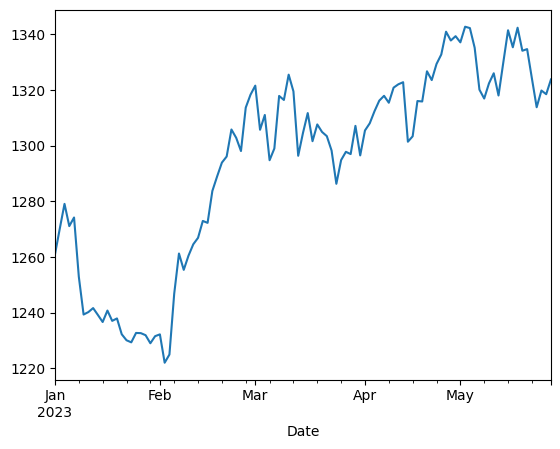

In [56]:
ex_us_kw_df['Close'].plot()

### 암호화폐 데이터

In [57]:
btc_krw_df = fdr.DataReader('BTC/KRW', '2023')
btc_krw_df
'''
BTC/KRW(비트코인당 원), ETH/KRW(이더리움당 원), XRP/KRW(리플당 원)
BTC/USD(비트코인당 달러) ...
'''

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,20881980.0,20983694.0,20848310.0,20976934.0,20976934.0,11664205615481
2023-01-02,20977476.0,21355044.0,20930146.0,21196110.0,21196110.0,15365444804389
2023-01-03,21196588.0,21310532.0,21286596.0,21340292.0,21340292.0,17787669052216
2023-01-04,21340738.0,21612098.0,21267144.0,21440006.0,21440006.0,23421496568532
2023-01-05,21440302.0,21411704.0,21411510.0,21458506.0,21458506.0,17451489256812
...,...,...,...,...,...,...
2023-05-22,35937472.0,36132932.0,35393188.0,35454384.0,35454384.0,11459626783399
2023-05-23,35449176.0,35568568.0,35105516.0,35287412.0,35287412.0,14530586645292
2023-05-24,35293568.0,35985904.0,35170116.0,35943132.0,35943132.0,18082910616976


<Axes: xlabel='Date'>

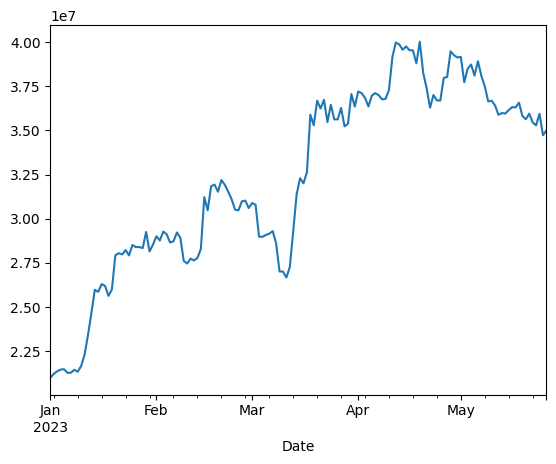

In [58]:
btc_krw_df['Close'].plot()

- 웹 상의 데이터를 클롤링
- 파일 형태의 데이터들
 - 한글, 엑셀, PDF

### 파일 데이터 (참고용 코드)

#### 한글(.hwp) 파일 크롤링

- ole 라이브러리

##### ole 라이브러리 설치

In [59]:
!pip install ole-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import ole

# 경로 설정
dir_path = 'data_hwp/'

# 파일 이름 설정 -> for문 순회
hwp_name = '예제.hwp'

# 경로 + 파일
hwp_path = os.path.join(dir_path, hwp_name)

# 불러오기
f = ole.open(hwp_path)

content = f.get_stream('PrvText').read().decode('utf-16le')
print(content)

```
[서식. 참가신청서] 
<교육 참가신청서>
<교 육 명><인공지능을 활용한 업무자동화 교육>
<교육일시><2019년 2월 15일(금) ~ 17일(일), 2박 3일>
<참가자 정보><성    명><홍길동><소    속><세종대학교><연 락 처><010.0000.0000>
<E-mail><example_jeju_gdg><주    소><서울특별시 중랑구><연 령 대>
<□ 10대       □ 20대      □ 30대      □ 40대이상>
<신청내용><관심분야 (중복선택가능)>
<□ HTML&CSS  □ Javascript  □ Python  □ 서비스기획·런칭  □ 기타 (          )>
<지원동기 (자유롭게 서술)>
<평소에 파이썬에 관심이 많았습니다.  업무자동화를 저의 업무에 적용하고 싶었는데.  
마침 좋은 기회가 있어서 지원하게 되었습니다.  이런 기회를 주셔서 감사합니다. >
<기술역량  및 경험 (자유롭게 서술)><파이썬은 1년 했고, 다른 쪽 개발 경험은 없습니다.  파이썬을 배우고 싶습니다. >
<상기와 같이 참가를 신청합니다. 2019년   1월   일 <신 청 자 :><홍길동><(서명 또는 날인) >>
```

In [60]:
# excel 파일로 변환하기

columns = ['Name', 'Company', 'Phone', 'e-mail', 'why', 'experience']

df = pd.DataFrame(columns=columns)


# 읽어온 값을 hwp 분리해서 딕셔너리
word_list = content.split('><')
target_list = ['성    명', '소    속', '연 락 처', 'E-mail', '지원동기', '연 령 대']

info_dict = {} # 데이터 추출후 저장할 빈 딕셔너리

NameError: ignored

In [ ]:
for n, target in enumerate(target_list):
  info = word_list[word_list.index(target) + 1]
  info_dict[column[n]] = info

df = pd.DataFrame(data=info_dict, index=[0], columns=columns)
df

In [ ]:
df.to_exel('예제.xlsx')

#### PDF 데이터 크롤링

In [ ]:
# 모듈 임포트
# !pip install pdfminer
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

In [ ]:
def pdf2txt(pdf_file):
    rsrcmgr = PDFResourceManager()
   
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(pdf_file, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()
    
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,
                                 caching=caching, check_extractable=True):
        interpreter.process_page(page)
    
    text = retstr.getvalue()
    
    fp.close()
    device.close()
    retstr.close()
    return text

In [ ]:
# pdf 파일 불러오기

import os
os.chdir('C:\workspace')
os.listdir('sample/')
pdf_path='sample/예제.pdf'

In [ ]:
text = pdf2txt(pdf_path)
text # text 파일로 변환해줌

# 연습문제

- Requests, BeatifulSoup을 이용해서 데이터를 가져와야하는데
- http://www.paullab.co.kr/stock.html 데이터 중 main 클래스의 2번째(1 인덱스)값을 가져와주세요.

In [61]:
import requests
from bs4 import BeautifulSoup

html = requests.get('http://www.paullab.co.kr/stock.html')
text = html.text

soup = BeautifulSoup(text, 'html.parser')
soup.select('.main')[1]

<div class="wrap main">
<div class="cat-img">
<img alt="(주)캣네가게 주가" src="cats_stock.png"/>
</div>
<div class="tables">
<table class="border-style" summary="시가총액 정보">
<tr>
<th class="strong" scope="row">시가총액</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
</tr>
<tr>
<th scope="row">
<a class="link_site" href="#">시가총액순위<i class="fas fa-caret-right"></i></a>
</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td>위니브월드 <em id="_market_sum">1</em>위</td>
</tr>
<tr>
<th scope="row">상장주식수</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td><em id="_market_sum">5,969,782,550</em></td>
</tr>
</table>
<table class="border-style" summary="업종상세 정보">
<tr>
<th class="strong" scope="row">현재가</th>
<td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
</tr>
<tr>
<th scope="row">52주 최고 <span class="bar">l</span> 최저</th>
<td>
<em>62,800</em>
<span class="bar">l</span>
<em>42,300</em>
</td>
</tr>
<tr>
<th scope="row">배당수익률 <span class="bar">l</span><span> 2019.12</span>
<a alt="배당수

In [62]:
soup.select('.main > table')

[<table class="table table-hover">
 <tbody>
 <tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span

- 제주코딩베이스캠프 연구원의 일별 시세 테이블을 가져와주세요.
 - 15분까지 정답 디스코드에 올려주세요.

In [63]:
soup.select('body > div:nth-child(3) > table')

one = soup.select('.main')[2]
two = one.select('table')

- (주) 캣네생선의 왼쪽 이미지를 불러온 뒤, 위 아래, 좌 우 반전시켜주세요.
- 디스코드에서 이미지를 다운받아 코랩 파일 경로에 직접 넣어주세요.

In [ ]:
# 필요한 모듈 임포트
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 불러오기
cat = Image.open('cats_stock.png')
# cat

# 배열로 변환
import numpy as np
pixel = np.array(cat)

# 위아래 반전
plt.imshow(pixel[::-1])
# 좌우 반전
plt.imshow(pixel[:, ::-1])

- sk하이닉스의 2020년도 데이터를 출력하고 그 시가 데이터를 그래프로 나타내주세요.

In [ ]:
# !pip install finance-datareader

In [ ]:
# 모듈 임포트
import FinanceDataReader as fdr

# 한국주식거래소에서 sk하이닉스 코드 확인
df_krx = fdr.StockListing('krx')

# sk 하이닉스 단일 종목 조회
sk_df = fdr.DataReader('00600', '2020', '2021')

# 시가 그래프
sk_df['Open'].plot()